#### Trie树：如何实现搜索引擎的搜索关键词提示功能？

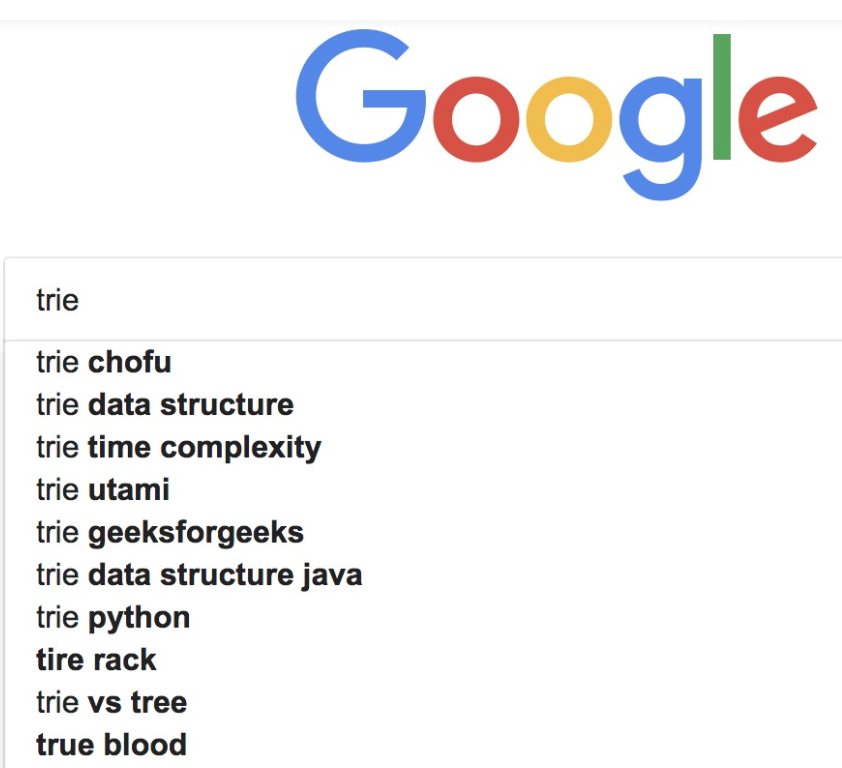

* Trie数，也叫“字典树”
  * 一种专门处理字符串匹配的数据结构
  * 用来解决在一组字符串集合中快速查找某个字符串的问题

* 本质：利用字符串之间的公共前缀，将重复的前缀合并到一起
* 根节点不包含任何信息，每个节点表示一个字符串中的字符，从根节点到红色节点的路径表示一个字符串（注意：红色节点并不都是叶子节点）
* 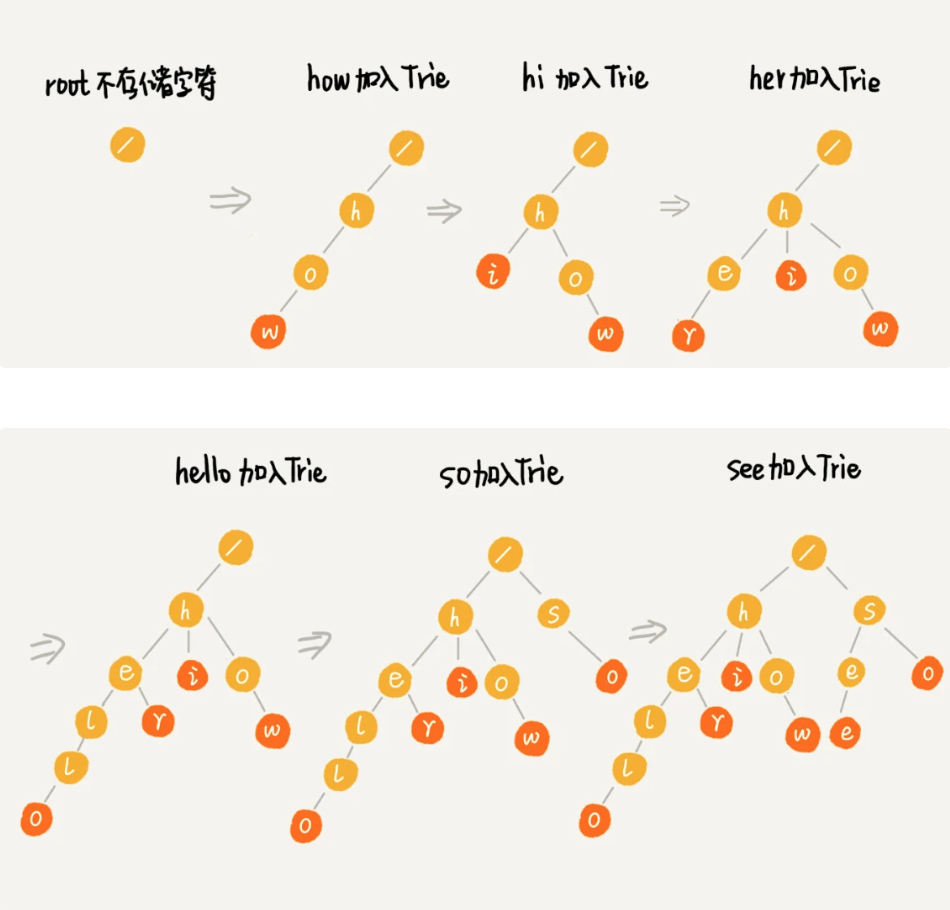


#### 存储方式

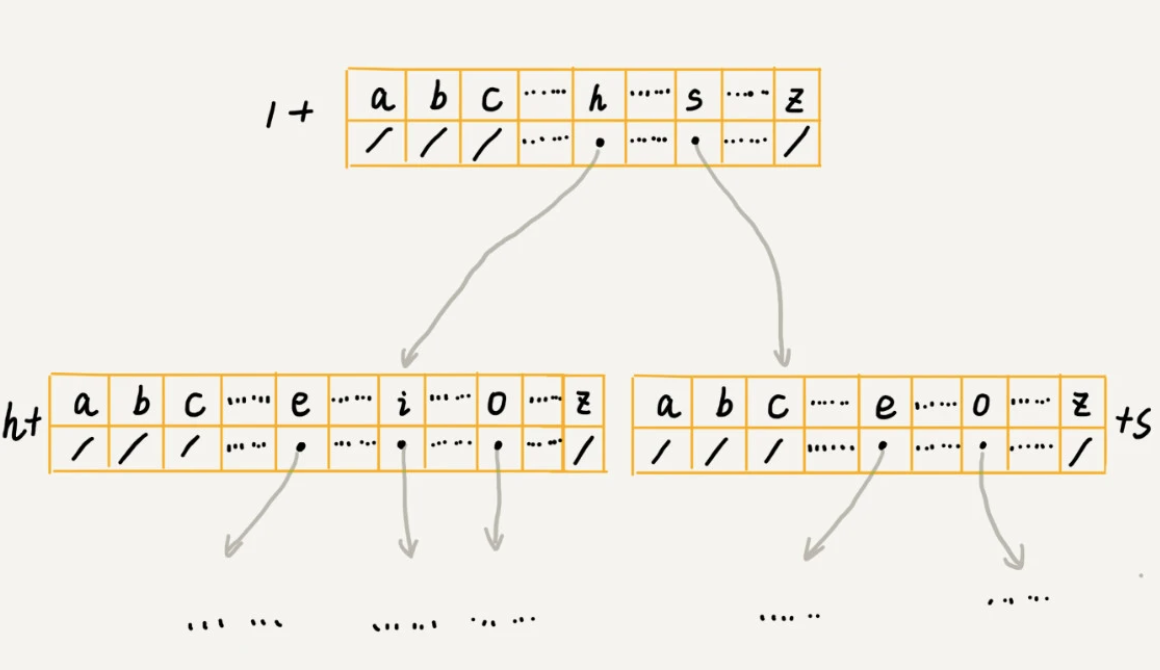

* 时间复杂度：
  * 查询：O(K)。如果要查询的字符串长度是 k，那我们只需要比对大约 k 个节点，就能完成查询操作

In [ ]:
'''
208. Implement Trie (Prefix Tree) Medium

A trie (pronounced as "try") or prefix tree is a tree data structure used to efficiently store and retrieve keys in a dataset of strings. There are various applications of this data structure, such as autocomplete and spellchecker.

Implement the Trie class:

Trie() Initializes the trie object.
void insert(String word) Inserts the string word into the trie.
boolean search(String word) Returns true if the string word is in the trie (i.e., was inserted before), and false otherwise.
boolean startsWith(String prefix) Returns true if there is a previously inserted string word that has the prefix prefix, and false otherwise
'''

class Trie:

    def __init__(self):
        self.root = {}
        self.endWord = "#"

    def insert(self, word: str) -> None:
        node = self.root
        for c in word:
            node = node.setdefault(c, {}) # # 如果c不在字典中，设置默认值{}
        node[self.endWord] = self.endWord
        

    def search(self, word: str) -> bool:
        node = self.root
        for c in word:
            if c not in node:
                return False
            node = node[c]
        return self.endWord in node
        

    def startsWith(self, prefix: str) -> bool:
        node = self.root
        for c in prefix:
            if c not in node:
                return False
            node = node[c]
        return True
        


# Your Trie object will be instantiated and called as such:
# obj = Trie()
# obj.insert(word)
# param_2 = obj.search(word)
# param_3 = obj.startsWith(prefix)

In [1]:
'''
212. Word Search II Hard

Given an m x n board of characters and a list of strings words, return all words on the board.

Each word must be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

Input: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]
Output: ["eat","oath"]
'''
from collections import defaultdict
 
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]
 
END_OF_WORD = "#"
 
class Solution:
    def findWords(self, board, words):
        """
        :type board: List[List[str]]
        :type words: List[str]
        :rtype: List[str]
        """
 
        if not board or not board[0]:
            return []
        if not words:
            return []
 
        self.result = set()
 
        root = defaultdict()
 
        for word in words:
            node = root
            for char in word:
                node = node.setdefault(char, defaultdict())
            node[END_OF_WORD] = END_OF_WORD
 
        self.m, self.n = len(board), len(board[0])
 
        for i in range(self.m):
            for j in range(self.n):
                if board[i][j] in root:
                    self._dfs(board, i, j, "", root)
        
        return list(self.result)
 
 
    def _dfs(self, board, i, j, cur_word, cur_dict):
        cur_word += board[i][j]
        cur_dict = cur_dict[board[i][j]]
 
        if END_OF_WORD in cur_dict:
            self.result.add(cur_word)
            
        tmp, board[i][j] = board[i][j], "@"
        for k in range(4):
            x, y = i + dx[k], j + dy[k]
            if 0 <= x < self.m and 0 <= y < self.n \
                and board[x][y] != "@" and board[x][y] in cur_dict:
                self._dfs(board, x, y, cur_word, cur_dict)
        board[i][j] = tmp

s = Solution()
board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]]
words = ["oath","pea","eat","rain"]
print(s.findWords(board, words))


['eat', 'oath']
